In [227]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import os

# World happiness report-2024 (dataset)

In [228]:
data = pd.read_csv('World-happiness-report-2024.csv')

In [229]:
data

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298
...,...,...,...,...,...,...,...,...,...,...,...,...
138,Congo (Kinshasa),Sub-Saharan Africa,3.295,3.462,3.128,0.534,0.665,0.262,0.473,0.189,0.072,1.102
139,Sierra Leone,Sub-Saharan Africa,3.245,3.366,3.124,0.654,0.566,0.253,0.469,0.181,0.053,1.068
140,Lesotho,Sub-Saharan Africa,3.186,3.469,2.904,0.771,0.851,0.000,0.523,0.082,0.085,0.875
141,Lebanon,Middle East and North Africa,2.707,2.797,2.616,1.377,0.577,0.556,0.173,0.068,0.029,-0.073


# EDA

In [230]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  143 non-null    object 
 1   Regional indicator            143 non-null    object 
 2   Ladder score                  143 non-null    float64
 3   upperwhisker                  143 non-null    float64
 4   lowerwhisker                  143 non-null    float64
 5   Log GDP per capita            140 non-null    float64
 6   Social support                140 non-null    float64
 7   Healthy life expectancy       140 non-null    float64
 8   Freedom to make life choices  140 non-null    float64
 9   Generosity                    140 non-null    float64
 10  Perceptions of corruption     140 non-null    float64
 11  Dystopia + residual           140 non-null    float64
dtypes: float64(10), object(2)
memory usage: 13.5+ KB


In [231]:
# Make the column names in lower case
data.columns = [x.lower() for x in data.columns]
data

,country name,regional indicator,ladder score,upperwhisker,lowerwhisker,log gdp per capita,social support,healthy life expectancy,freedom to make life choices,generosity,perceptions of corruption,dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298
...,...,...,...,...,...,...,...,...,...,...,...,...
138,Congo (Kinshasa),Sub-Saharan Africa,3.295,3.462,3.128,0.534,0.665,0.262,0.473,0.189,0.072,1.102
139,Sierra Leone,Sub-Saharan Africa,3.245,3.366,3.124,0.654,0.566,0.253,0.469,0.181,0.053,1.068
140,Lesotho,Sub-Saharan Africa,3.186,3.469,2.904,0.771,0.851,0.000,0.523,0.082,0.085,0.875
141,Lebanon,Middle East and North Africa,2.707,2.797,2.616,1.377,0.577,0.556,0.173,0.068,0.029,-0.073


In [232]:
# Rename the columns name in shorter way
data.rename(columns = {'ladder score':'happiness score', 'perceptions of corruption':'corruption'}, inplace = True)
data

,country name,regional indicator,happiness score,upperwhisker,lowerwhisker,log gdp per capita,social support,healthy life expectancy,freedom to make life choices,generosity,corruption,dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298
...,...,...,...,...,...,...,...,...,...,...,...,...
138,Congo (Kinshasa),Sub-Saharan Africa,3.295,3.462,3.128,0.534,0.665,0.262,0.473,0.189,0.072,1.102
139,Sierra Leone,Sub-Saharan Africa,3.245,3.366,3.124,0.654,0.566,0.253,0.469,0.181,0.053,1.068
140,Lesotho,Sub-Saharan Africa,3.186,3.469,2.904,0.771,0.851,0.000,0.523,0.082,0.085,0.875
141,Lebanon,Middle East and North Africa,2.707,2.797,2.616,1.377,0.577,0.556,0.173,0.068,0.029,-0.073


In [233]:
# Check the null values in our data
data.isnull().sum()

country name                    0
regional indicator              0
happiness score                 0
upperwhisker                    0
lowerwhisker                    0
log gdp per capita              3
social support                  3
healthy life expectancy         3
freedom to make life choices    3
generosity                      3
corruption                      3
dystopia + residual             3
dtype: int64

In [234]:
# we have rows with mostly null values
data[data["corruption"].isnull()]

,country name,regional indicator,happiness score,upperwhisker,lowerwhisker,log gdp per capita,social support,healthy life expectancy,freedom to make life choices,generosity,corruption,dystopia + residual
61,Bahrain,Middle East and North Africa,5.959,6.153,5.766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,Tajikistan,Commonwealth of Independent States,5.281,5.361,5.201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,State of Palestine,Middle East and North Africa,4.879,5.006,4.753,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# EDA (Handling the missing value)

In [235]:
# Exclude non-numeric columns to fill missing values. there are 3 ways for this

# data = data.fillna(0) # this way is the first one, we can replace the NaN values with 0

# we replace the NaN values with the mean vlaue of the column in the following 2nd way
#numeric_cols = data.select_dtypes(include=np.number).columns
#data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# we can delete the NaN rows in the 3rd following method 
data = data.dropna(subset=['corruption'])

# Verify that there are no more missing values in the 'corruption' column
data[data['corruption'].isnull()]

,country name,regional indicator,happiness score,upperwhisker,lowerwhisker,log gdp per capita,social support,healthy life expectancy,freedom to make life choices,generosity,corruption,dystopia + residual


In [236]:
data.isnull().sum()

country name                    0
regional indicator              0
happiness score                 0
upperwhisker                    0
lowerwhisker                    0
log gdp per capita              0
social support                  0
healthy life expectancy         0
freedom to make life choices    0
generosity                      0
corruption                      0
dystopia + residual             0
dtype: int64

In [237]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, 0 to 142
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country name                  140 non-null    object 
 1   regional indicator            140 non-null    object 
 2   happiness score               140 non-null    float64
 3   upperwhisker                  140 non-null    float64
 4   lowerwhisker                  140 non-null    float64
 5   log gdp per capita            140 non-null    float64
 6   social support                140 non-null    float64
 7   healthy life expectancy       140 non-null    float64
 8   freedom to make life choices  140 non-null    float64
 9   generosity                    140 non-null    float64
 10  corruption                    140 non-null    float64
 11  dystopia + residual           140 non-null    float64
dtypes: float64(10), object(2)
memory usage: 14.2+ KB


In [238]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
happiness score,140.0,5.530893,1.181247,1.721,4.63175,5.8005,6.42625,7.741
upperwhisker,140.0,5.644057,1.165108,1.775,4.76225,5.9110,6.51525,7.815
lowerwhisker,140.0,5.417700,1.198051,1.667,4.50375,5.6765,6.33825,7.667
log gdp per capita,140.0,1.378807,0.425098,0.000,1.07775,1.4315,1.74150,2.141
social support,140.0,1.134329,0.333317,0.000,0.92175,1.2375,1.38325,1.617
healthy life expectancy,140.0,0.520886,0.164923,0.000,0.39800,0.5495,0.64850,0.857
freedom to make life choices,140.0,0.620621,0.162492,0.000,0.52750,0.6410,0.73600,0.863
generosity,140.0,0.146271,0.073441,0.000,0.09100,0.1365,0.19250,0.401
corruption,140.0,0.154121,0.126238,0.000,0.06875,0.1205,0.19375,0.575
dystopia + residual,140.0,1.575914,0.537459,-0.073,1.30825,1.6445,1.88175,2.998


In [ ]:
# Define a dictionary for manually filling the missing regions
# missing_regions = {
#   'Belarus': 'Central and Eastern Europe',
#   'Belize': 'Latin America and Caribbean',
#   'Bhutan': 'South Asia',
#    'Burundi': 'Sub-Saharan Africa',
#    'Central African Republic': 'Sub-Saharan Africa',
#    'Cuba': 'Latin America and Caribbean',
#    'Djibouti': 'Sub-Saharan Africa',
#    'Guyana': 'Latin America and Caribbean',
#    'Haiti': 'Latin America and Caribbean',
#    'Maldives': 'South Asia',
#    'Oman': 'Middle East and North Africa',
#    'Qatar': 'Middle East and North Africa',
#    'Rwanda': 'Sub-Saharan Africa',
#    'Somalia': 'Sub-Saharan Africa',
#    'Somaliland region': 'Sub-Saharan Africa',
#    'South Sudan': 'Sub-Saharan Africa',
#    'Sudan': 'Sub-Saharan Africa',
#    'Suriname': 'Latin America and Caribbean',
#    'Syria': 'Middle East and North Africa',
#    'Trinidad and Tobago': 'Latin America and Caribbean',
#    'Turkmenistan': 'Central Asia',
#    'Türkiye': 'Western Asia'
#}

#data['regional indicator'] = data.apply(
#    lambda row: missing_regions[row['country name']] if pd.isnull(row['regional indicator']) else row['regional indicator'], axis=1
#)

# Verify that there are no more NaN values in the 'Regional indicator' column
#data['regional indicator'].isnull().sum()

In [215]:
data["regional indicator"].value_counts()

regional indicator
Sub-Saharan Africa                    35
Western Europe                        20
Latin America and Caribbean           19
Central and Eastern Europe            17
Middle East and North Africa          15
Southeast Asia                         9
Commonwealth of Independent States     9
East Asia                              6
South Asia                             6
North America and ANZ                  4
Name: count, dtype: int64

In [216]:
#data["regional indicator"].dropna().unique()
#data[data['regional indicator'].isnull()]['country name'].unique()

In [217]:
# Verify that there are no more NaN values in the 'Regional indicator' column
data['regional indicator'].isnull().sum()


0

In [218]:
data["regional indicator"].nunique()

10

In [219]:
data["country name"].nunique()

140

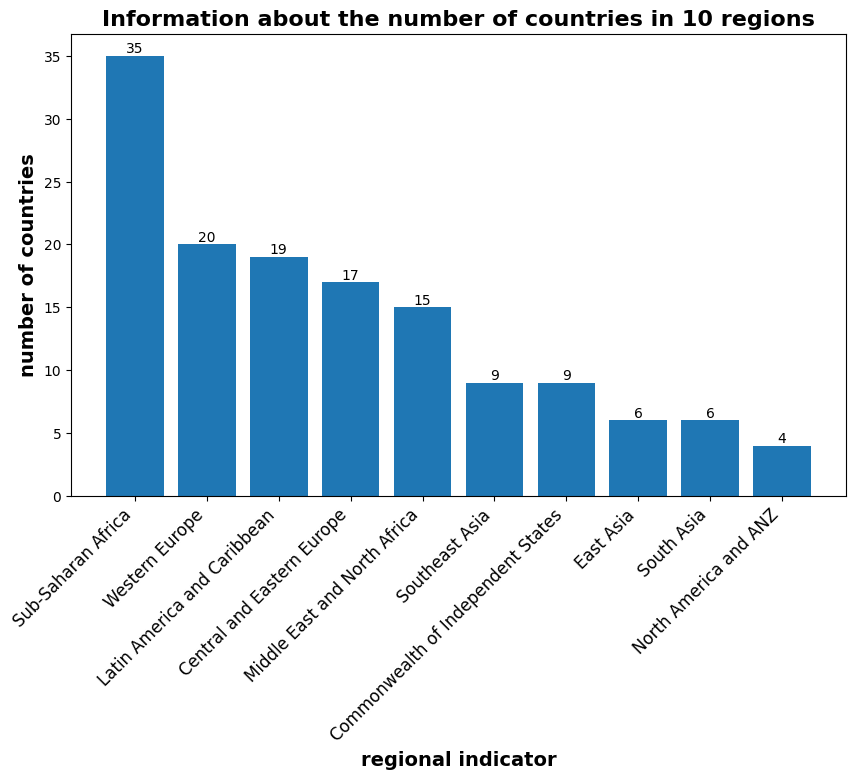

In [220]:
# count regional indicator

region_counts = data['regional indicator'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
bar_plot = plt.bar(region_counts.index, region_counts.values)
plt.bar_label(bar_plot, labels=region_counts.values, label_type='edge')
# Axis Details and Title
plt.xticks(rotation=45, ha='right', fontsize = 12)
plt.title("Information about the number of countries in 10 regions", fontweight = 'bold', fontsize = 16, color='black')  # Title for the plot
plt.xlabel("regional indicator", fontweight = 'bold', fontsize = 14, color='black')  # Label for the x-axis
plt.ylabel("number of countries", fontweight = 'bold', fontsize = 14, color='black')  # Label for the y-axis - not required
# plt.savefig('avg_price_nbhd.png',dpi =300)
plt.show()

# EDA (Relationship between features)

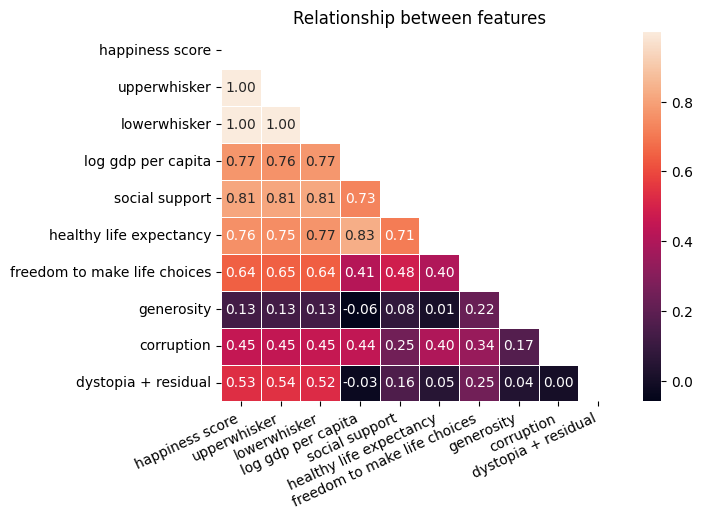

In [138]:
numeric_df = data.select_dtypes(include='number') # Sometimes, we need to mention numeric columns for correlation matrix

#plt.figure(figsize=(12,7))
#sns.heatmap(lend_df.corr(), annot=True, cmap='plasma')
# the following code is for the full correlation heatmap
#sns.heatmap(data=numeric_df.corr(), fmt ='.2f', linewidths=0.5, annot=True)
plt.title("Relationship between features")
#plt.show()

# the following code shows the half correlation heatmap

mask = np.triu(np.ones_like(numeric_df.corr(), dtype=bool))
#plt.figure(figsize=(10, 8))
sns.heatmap(data=numeric_df.corr(), annot=True,fmt='.2f', linewidths=0.5, mask=mask)
plt.xticks(rotation=25, ha='right')
#plt.title('Correlation Heatmap')
plt.show()

In [408]:
data[['social support', 'corruption','healthy life expectancy']].describe().T  

,count,mean,std,min,25%,50%,75%,max
social support,140.0,1.134329,0.333317,0.0,0.92175,1.2375,1.38325,1.617
corruption,140.0,0.154121,0.126238,0.0,0.06875,0.1205,0.19375,0.575
healthy life expectancy,140.0,0.520886,0.164923,0.0,0.39800,0.5495,0.64850,0.857


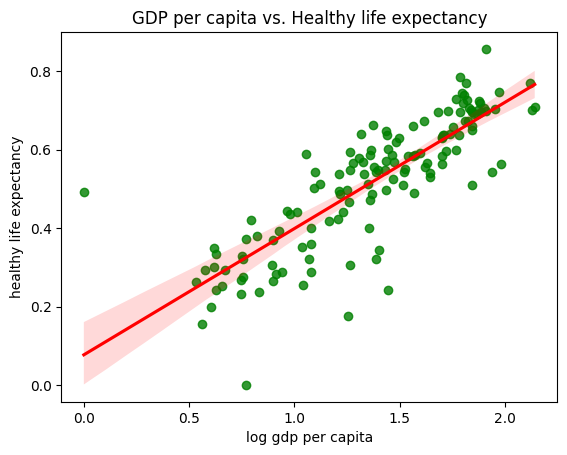

In [409]:
plt.title('GDP per capita vs. Healthy life expectancy')  # Add title
sns.regplot(
    x='log gdp per capita',

    y='healthy life expectancy',
    data= data,
    scatter_kws={"color": "green"},  # Set color of the scatter points # kws is an abbreviation for keyword arguments
    line_kws={"color": "red"}  # Set color of the regression line # kws is an abbreviation for keyword arguments
)
plt.show()



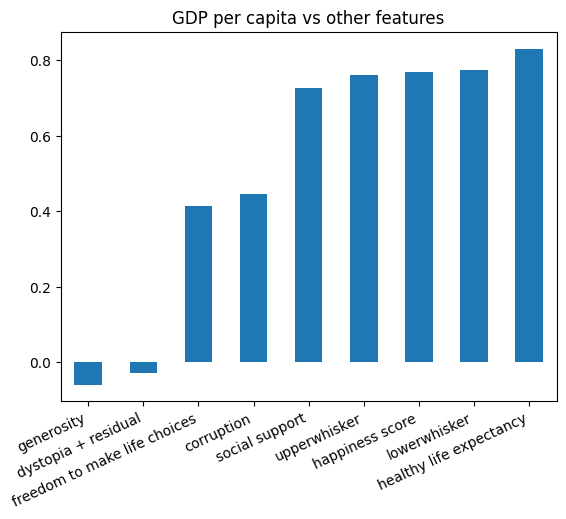

In [410]:
numeric_df.corr()['log gdp per capita'].sort_values().drop('log gdp per capita').plot(kind='bar')
plt.title('GDP per capita vs other features')
plt.xticks(rotation=25, ha='right')
plt.show()

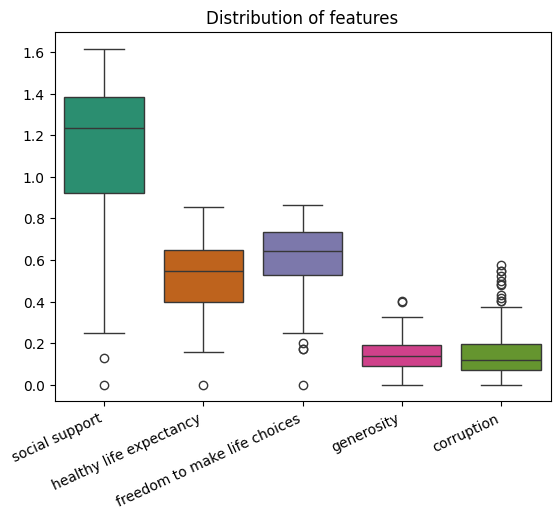

In [411]:
# distribution of Social support,Freedom to make life choices,Generosity,Perceptions of corruption
# Detecting the outliers
list_features = ['social support','healthy life expectancy','freedom to make life choices','generosity','corruption']
sns.boxplot(data=data.loc[:,list_features],palette = 'Dark2')
plt.title("Distribution of features")
plt.xticks(rotation=25, ha='right')
plt.show()

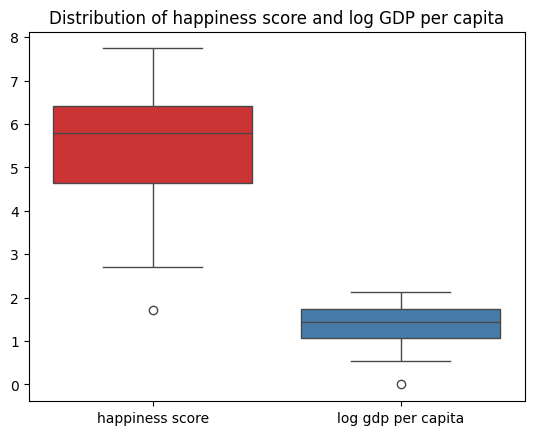

In [242]:
# distribution of Ladder score and Logged GDP per capita
list_features_1 = ['happiness score','log gdp per capita']
# sns.boxplot(data=data.loc[:,list_features_1],orient='h',palette = 'Set3')
sns.boxplot(data=data.loc[:,list_features_1],palette = 'Set1')
plt.title("Distribution of happiness score and log GDP per capita")
#plt.ylabel("Plot B")
plt.show()

In [239]:
# you want to see the information for a specific row 
data[(data.loc[:,'country name']== 'Thailand')]

,country name,regional indicator,happiness score,upperwhisker,lowerwhisker,log gdp per capita,social support,healthy life expectancy,freedom to make life choices,generosity,corruption,dystopia + residual
57,Thailand,Southeast Asia,5.976,6.094,5.858,1.484,1.347,0.62,0.756,0.283,0.024,1.463


In [414]:
#data[(data["healthy life expectancy"]) & (data["regional indicator"] == "Central and Eastern Europe")].hist(figsize=(18,12), bins=50, grid=False);

# Data visualization

C:\Users\Rabia Afzal\AppData\Local\Temp\ipykernel_36376\1568069565.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




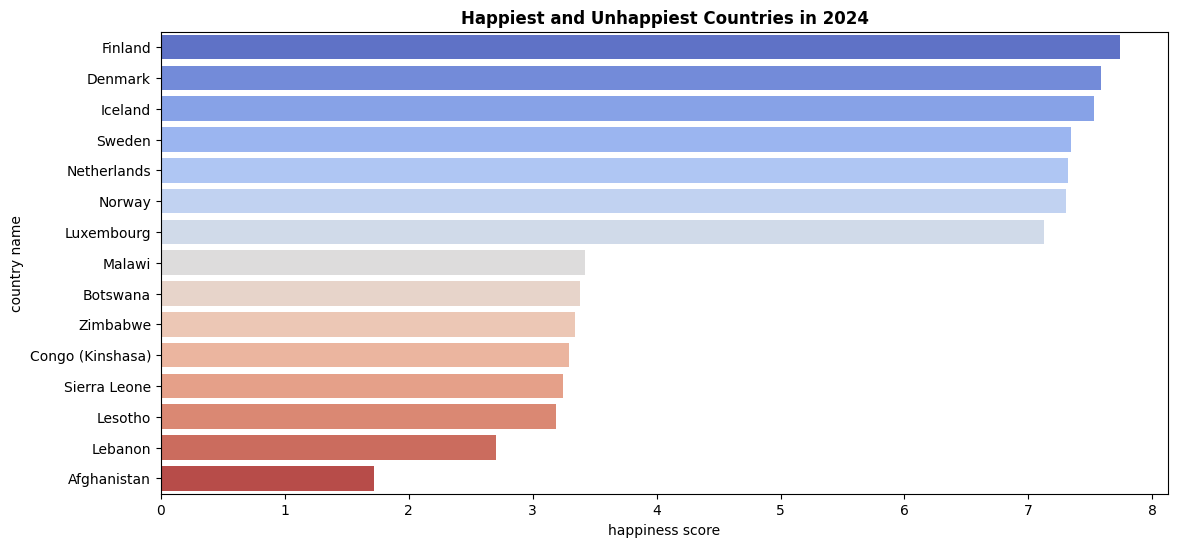

In [240]:
#sns.scatterplot(
#    x='social support',
#    y='freedom to make life choices',
#    data= data
#)
#plt.show()
plt.figure(figsize = (13,6))
data_happiest_unhappiest = data[((data.loc[:,'happiness score']>=7.1)|(data.loc[:,'happiness score']<=3.5))&(data.loc[:,'country name']!= 'Israel')]
sns.barplot(x = 'happiness score', y= 'country name',data = data_happiest_unhappiest, palette = 'coolwarm')
plt.title('Happiest and Unhappiest Countries in 2024',fontweight = 'bold')
plt.show()

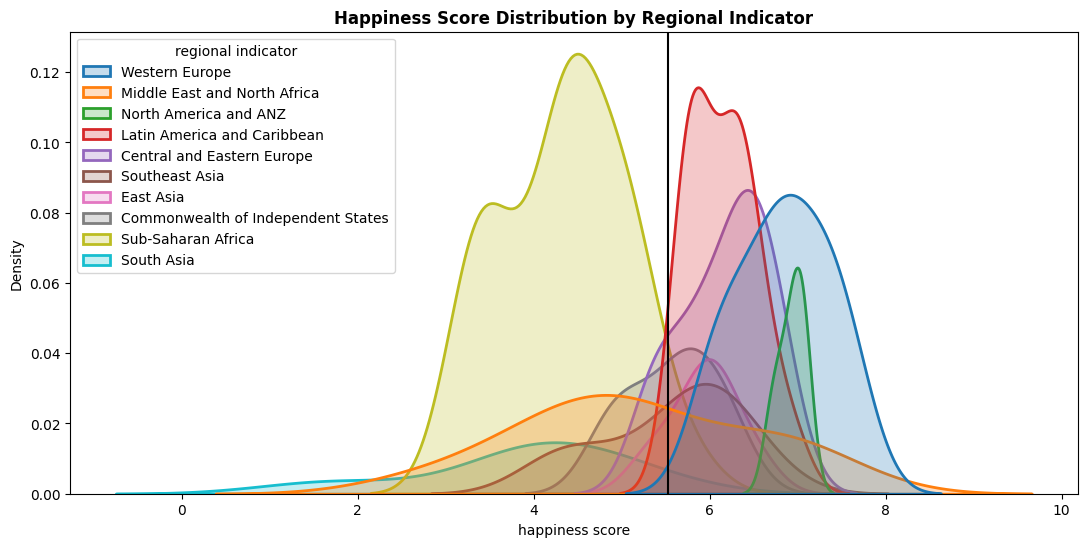

In [416]:
plt.figure(figsize = (13,6))
sns.kdeplot(x=data['happiness score'], hue = data['regional indicator'], fill = True, linewidth = 2)
plt.axvline(data['happiness score'].mean(),c= 'black')
plt.title('Happiness Score Distribution by Regional Indicator', fontweight = 'bold')
plt.show()

C:\Users\Rabia Afzal\AppData\Local\Temp\ipykernel_36376\995358062.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




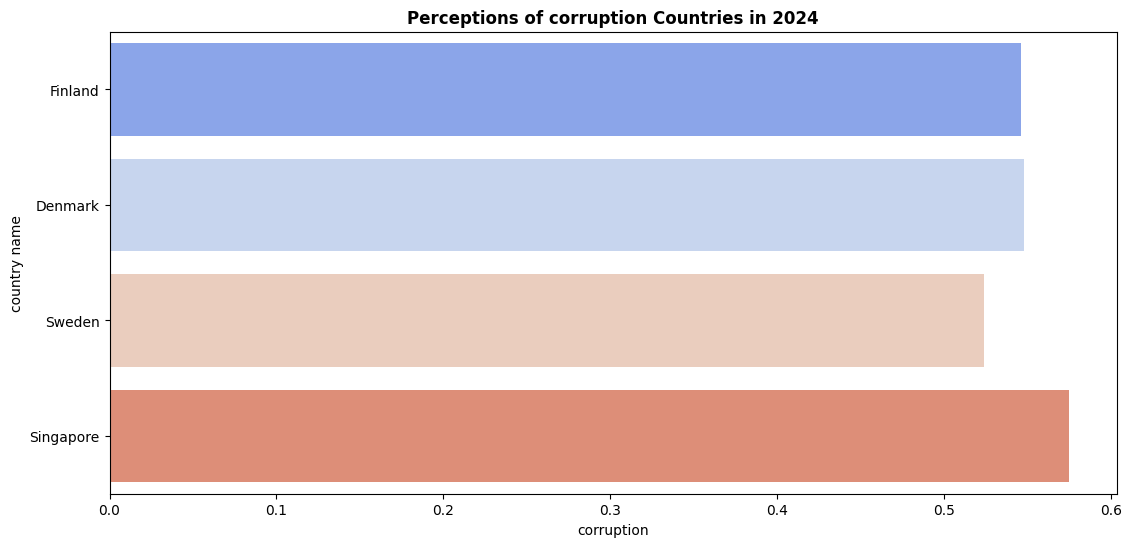

In [222]:
plt.figure(figsize = (13,6))
data_happiest_unhappiest = data[(data.loc[:,'corruption']>0.5)]
sns.barplot(x = 'corruption', y= 'country name',data = data_happiest_unhappiest, palette = 'coolwarm')
plt.title('Perceptions of corruption Countries in 2024',fontweight = 'bold')
plt.show()

In [418]:
#data_1 = data[["regional indicator", "healthy life expectancy"]]

In [68]:
# this following code is used for getting the output file 
# data.to_csv('out.csv', index=False) 


In [170]:
# GDP per capita comparison among countries
# it plots the map in my browser
import plotly.express as px
fig = px.choropleth(data.sort_values('regional indicator'), 
                    locations = 'country name',
                    color ='log gdp per capita',
                    locationmode = 'country names',
                    animation_frame = 'regional indicator')
fig.update_layout(title = 'log GDP per capita comparison by countries in any of 10 regions')
fig.show()

In [241]:
import plotly.express as px
data_sort = data.sort_values('regional indicator')
fig = px.scatter_geo(data_sort, 
                    locations = 'country name',
                    color ='log gdp per capita',
                    locationmode = 'country names',
                    title  = 'GDP per capita comparison by countries in any of 10 regions'
                    )
fig.show()

In [421]:
# print(os.getcwd())

Text(0, 0.5, 'generosity')

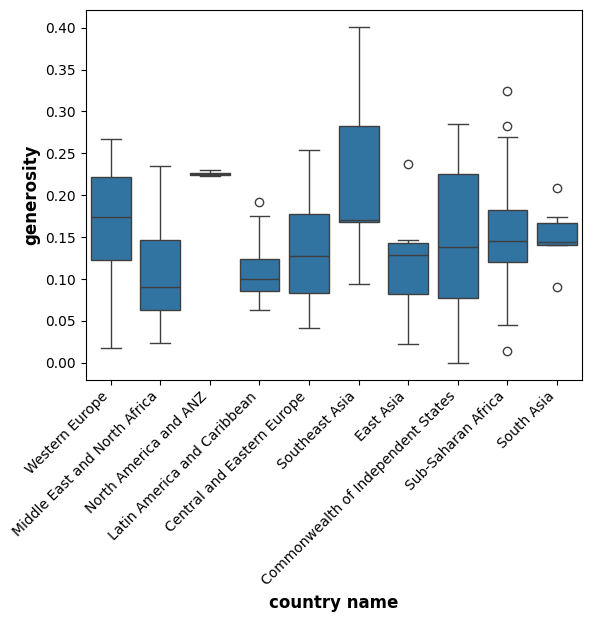

In [49]:
sns.boxplot(data=data, x ="regional indicator", y="generosity")
plt.xticks(rotation=45, ha='right')
plt.xlabel("country name",{'fontsize': 12, 'fontweight': 'bold'}) # Label for the x-axis
plt.ylabel("generosity",{'fontsize': 12, 'fontweight': 'bold'})

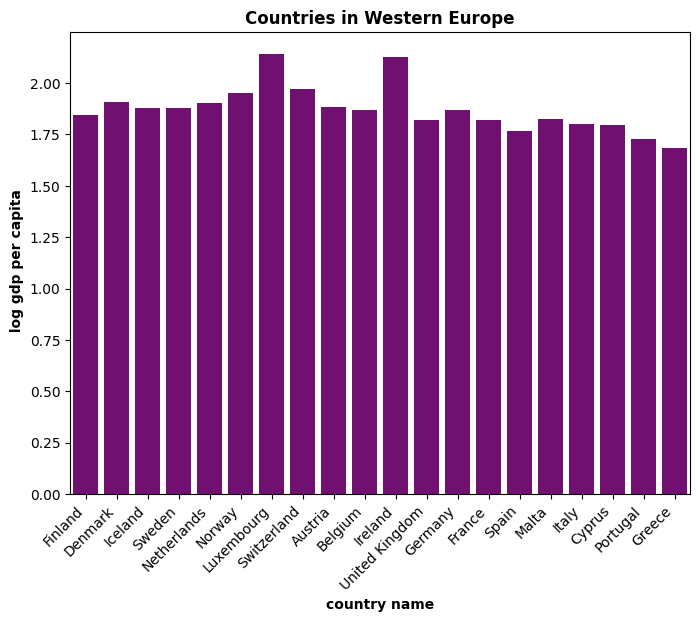

In [423]:
# Make a histogram of the bill_depth_mm variable for only those observations that are more than 15mm, with a skew curve
plt.figure(figsize=(8, 6))  # Set the figure size


# Create the histogram plot with custom colour and size
sns.barplot(data=data[data["regional indicator"] == 'Western Europe'], x="country name", y="log gdp per capita", color='purple')
plt.xticks(rotation=45, ha='right')
plt.title("Countries in Western Europe", fontweight = 'bold', color='black')  # Title for the plot
plt.xlabel("country name", fontweight = 'bold', color='black')  # Label for the x-axis
plt.ylabel(" log gdp per capita", fontweight = 'bold', color='black')

plt.show()


In [197]:
#data["corruption"].sort_values()

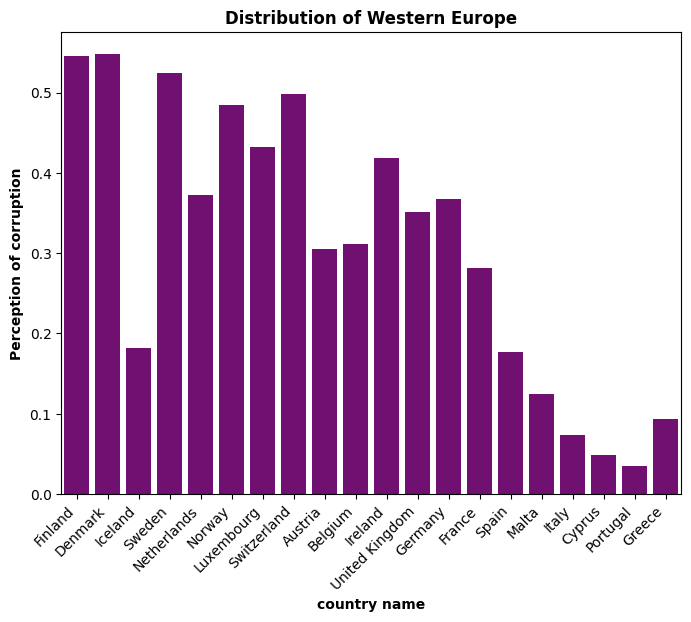

In [427]:
plt.figure(figsize=(8, 6))  # Set the figure size

plt.title("Distribution of Bill Depth")  # Title for the plot
average_price = data["corruption"].sort_values()
# Create the histogram plot with custom colour and size
sns.barplot(data=data[data["regional indicator"] == 'Western Europe'], x="country name",y = data["corruption"].sort_values(), color='purple')
plt.xticks(rotation=45, ha='right')
plt.title("Distribution of Western Europe", fontweight = 'bold', color='black')  # Title for the plot
plt.xlabel("country name", fontweight = 'bold', color='black')  # Label for the x-axis
plt.ylabel("Perception of corruption", fontweight = 'bold', color='black')

plt.show()

In [ ]:

sns.barplot(data=data[data["regional indicator"] == 'Western Europe'], x="country name", y="ladder score", color='purple')
plt.xticks(rotation=45, ha='right')
plt.title("Distribution of Western Europe", fontweight = 'bold', color='black')  # Title for the plot
plt.xlabel("country name", fontweight = 'bold', color='black')  # Label for the x-axis
plt.ylabel(" log gdp per capita", fontweight = 'bold', color='black')

plt.show()

In [ ]:
#numeric_df.corr()

In [ ]:
#plt.figure(figsize=(10,6))
#sns.heatmap(data=numeric_df.corr(), linewidths=0.5, annot=True)

# World-happiness-report-2005-2023 (Dataset)

In [97]:
# I uploaded and cleaned this data file world happiness report for 2005-2023 to compare the visualizations in Power BI. But these viualizations in
# Power BI doesn't give me much important information because I already covered all sectors in visualization of world happiness 2024 report. That's I 
# didn't add it in visualization. You can have a look at my following cleaning steps I did for world happiness report for 2005-2023.  
#data_2 = pd.read_csv('World-happiness-report-2023.csv', encoding="utf-8")

data_2 = pd.read_csv("World-happiness-report-2005-2023.csv", encoding="latin-1")

In [98]:
data_2

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.500,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.800,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.100,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.234,0.776,0.614,0.268
...,...,...,...,...,...,...,...,...,...,...,...
2358,Zimbabwe,2019,2.694,7.698,0.759,53.100,0.632,-0.051,0.831,0.658,0.235
2359,Zimbabwe,2020,3.160,7.596,0.717,53.575,0.643,0.003,0.789,0.661,0.346
2360,Zimbabwe,2021,3.155,7.657,0.685,54.050,0.668,-0.079,0.757,0.610,0.242
2361,Zimbabwe,2022,3.296,7.670,0.666,54.525,0.652,-0.073,0.753,0.641,0.191


In [81]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB


In [82]:
data_2.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   28
Social support                       13
Healthy life expectancy at birth     63
Freedom to make life choices         36
Generosity                           81
Perceptions of corruption           125
Positive affect                      24
Negative affect                      16
dtype: int64

In [99]:
# we replace the NaN values with the mean vlaue of the column in the following 2nd way
numeric_cols = data_2.select_dtypes(include=np.number).columns
data_2[numeric_cols] = data_2[numeric_cols].fillna(data_2[numeric_cols].mean())

In [100]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2363 non-null   float64
 4   Social support                    2363 non-null   float64
 5   Healthy life expectancy at birth  2363 non-null   float64
 6   Freedom to make life choices      2363 non-null   float64
 7   Generosity                        2363 non-null   float64
 8   Perceptions of corruption         2363 non-null   float64
 9   Positive affect                   2363 non-null   float64
 10  Negative affect                   2363 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB


In [93]:
data_2.isnull().sum()

Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

In [101]:
# Make the column names in lower case
data_2.columns = [x.lower() for x in data_2.columns]
data_2

,country name,year,life ladder,log gdp per capita,social support,healthy life expectancy at birth,freedom to make life choices,generosity,perceptions of corruption,positive affect,negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.500,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.800,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.100,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.234,0.776,0.614,0.268
...,...,...,...,...,...,...,...,...,...,...,...
2358,Zimbabwe,2019,2.694,7.698,0.759,53.100,0.632,-0.051,0.831,0.658,0.235
2359,Zimbabwe,2020,3.160,7.596,0.717,53.575,0.643,0.003,0.789,0.661,0.346
2360,Zimbabwe,2021,3.155,7.657,0.685,54.050,0.668,-0.079,0.757,0.610,0.242
2361,Zimbabwe,2022,3.296,7.670,0.666,54.525,0.652,-0.073,0.753,0.641,0.191


In [14]:
print(data_2.columns)

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')


In [102]:
data_2.rename(columns = {'ladder score':'happiness score', 'perceptions of corruption':'corruption', 'healthy life expectancy at birth':'healthy life expectancy'}, inplace = True)
data_2

,country name,year,life ladder,log gdp per capita,social support,healthy life expectancy,freedom to make life choices,generosity,corruption,positive affect,negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.500,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.800,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.100,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.234,0.776,0.614,0.268
...,...,...,...,...,...,...,...,...,...,...,...
2358,Zimbabwe,2019,2.694,7.698,0.759,53.100,0.632,-0.051,0.831,0.658,0.235
2359,Zimbabwe,2020,3.160,7.596,0.717,53.575,0.643,0.003,0.789,0.661,0.346
2360,Zimbabwe,2021,3.155,7.657,0.685,54.050,0.668,-0.079,0.757,0.610,0.242
2361,Zimbabwe,2022,3.296,7.670,0.666,54.525,0.652,-0.073,0.753,0.641,0.191


In [104]:
data_2 = data_2.drop(["positive affect","negative affect"],axis =1)
data_2

,country name,year,life ladder,log gdp per capita,social support,healthy life expectancy,freedom to make life choices,generosity,corruption
0,Afghanistan,2008,3.724,7.350,0.451,50.500,0.718,0.164,0.882
1,Afghanistan,2009,4.402,7.509,0.552,50.800,0.679,0.187,0.850
2,Afghanistan,2010,4.758,7.614,0.539,51.100,0.600,0.118,0.707
3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.160,0.731
4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.234,0.776
...,...,...,...,...,...,...,...,...,...
2358,Zimbabwe,2019,2.694,7.698,0.759,53.100,0.632,-0.051,0.831
2359,Zimbabwe,2020,3.160,7.596,0.717,53.575,0.643,0.003,0.789
2360,Zimbabwe,2021,3.155,7.657,0.685,54.050,0.668,-0.079,0.757
2361,Zimbabwe,2022,3.296,7.670,0.666,54.525,0.652,-0.073,0.753


In [105]:
data_2.to_csv('out.csv', index=False) 

In [57]:
# can you tey adding these lines before the fight.show in the code for plotting. I tried this one but doesn,t work.

#import plotly.io as pio
#pio.renderers.default = 'notebook'
#fig.show()

In [ ]:
#pip install --upgrade plotly

In [198]:
#pip install ipython

In [77]:
import plotly.express as px
fig = px.choropleth(data_2.sort_values('year'),
                   locations = 'Country name',
                   color = 'Generosity',
                   locationmode = 'country names',
                   animation_frame = 'year')
fig.update_layout(title = 'Generosity Comparison by Countries')
fig.show()


# the following code shows the above plot in brower. I added it because the above code is not showing the plot in jupyter notebook.
#import plotly.io as pio
#pio.renderers.default = 'browser'
#fig.show()

In [199]:
#import plotly.express as px
#df = px.data.gapminder().query("year == 2012")
#fig = px.scatter(df, x='gdpPercap', y='lifeExp', color='continent', hover_name='country')
#fig.show()